## How much revenue our movie will make?

***

In [2]:
import pandas as pd

df = pd.read_excel('D:\Project\IT Tools Training\Pyhton\Machine Learning\Movie Dataset.xlsx')

df.head()

,Production_Budget,Rank,Release Date,Movie Title,Worldwide_Gross,Domestic Gross ()
0,110000,5293,1915-02-08 00:00:00,The Birth of a Nation,11000000,10000000
1,385907,5140,1916-09-05 00:00:00,Intolerance,0,0
2,200000,5230,12/24/1916,"20,000 Leagues Under the Sea",8000000,8000000
3,100000,5299,9/17/1920,Over the Hill to the Poorhouse,3000000,3000000
4,245000,5222,1925-01-01 00:00:00,The Big Parade,22000000,11000000


EDA - Exploratory Data Analysis

In [3]:
df.shape

(5391, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
Production_Budget    5391 non-null int64
Rank                 5391 non-null int64
Release Date         5391 non-null object
Movie Title          5391 non-null object
Worldwide_Gross      5391 non-null int64
Domestic Gross ()    5391 non-null int64
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


In [9]:
df1 = df[df['Worldwide_Gross'] > 0]

In [10]:
df1.head()

,Production_Budget,Rank,Release Date,Movie Title,Worldwide_Gross,Domestic Gross ()
0,110000,5293,1915-02-08 00:00:00,The Birth of a Nation,11000000,10000000
2,200000,5230,12/24/1916,"20,000 Leagues Under the Sea",8000000,8000000
3,100000,5299,9/17/1920,Over the Hill to the Poorhouse,3000000,3000000
4,245000,5222,1925-01-01 00:00:00,The Big Parade,22000000,11000000
5,3900000,4250,12/30/1925,Ben-Hur,9000000,9000000


In [13]:
df1.describe()

,Production_Budget,Rank,Worldwide_Gross,Domestic Gross ()
count,5.034000e+03,5034.000000,5.034000e+03,5.034000e+03
mean,3.290784e+07,2571.987882,9.515685e+07,4.415985e+07
std,4.112589e+07,1513.859403,1.726012e+08,6.737926e+07
min,1.100000e+03,1.000000,2.600000e+01,0.000000e+00
25%,6.000000e+06,1266.250000,7.000000e+06,3.209372e+06
50%,1.900000e+07,2543.500000,3.296202e+07,2.034680e+07
75%,4.200000e+07,3839.750000,1.034471e+08,5.600026e+07
max,4.250000e+08,5391.000000,2.783919e+09,9.366622e+08


In [20]:
df1.shape
df1.columns

Index(['Production_Budget', 'Rank', 'Release Date', 'Movie Title',
       'Worldwide_Gross', 'Domestic Gross ()'],
      dtype='object')

***

   ## SLR
   
    y = b0 + b1 * X1
    Sales = Intercept + Slope * Budget

In [24]:
# y = pd.DataFrame(df1, columns=['Worldwide_Gross'])

#prepairing dependent variable
y = df1.iloc[:,4].values
X = df1.iloc[:,:1].values

Create Graph

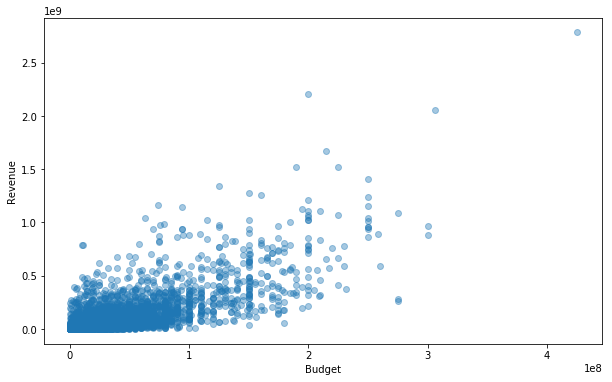

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
plt.scatter(X,y, alpha=0.4)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


## Linear Regression Model

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
# Slope
b1
print(reg.coef_)

[3.11150918]


In [31]:
# Y axis Intercept
b0
print(reg.intercept_)

-7236192.729139626


In [ ]:
# budget = 100000

# revenue = b1 * budget + b0


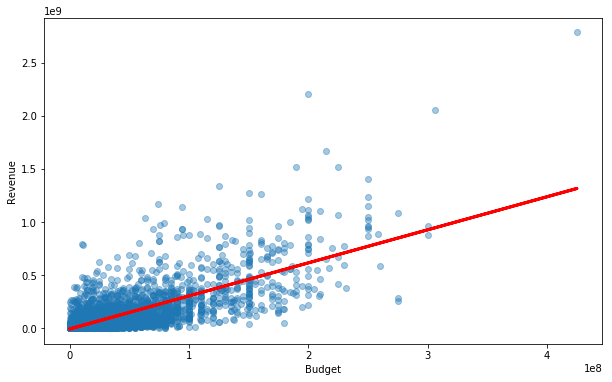

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
plt.scatter(X,y, alpha=0.4)
plt.plot(X,reg.predict(X), color = 'red', linewidth=3)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

R Squared Value

In [37]:
# its a statistical measure of how close the data are to the fitted regression line.

reg.score(X,y)

0.5496485356985729

## Machine Learning

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)


In [41]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
y_pred = reg1.predict(X_test)


[2.30182727e+08 8.00471776e+06 2.46052585e+08 ... 1.91136182e+07
 3.33964902e+07 4.83074620e+06]


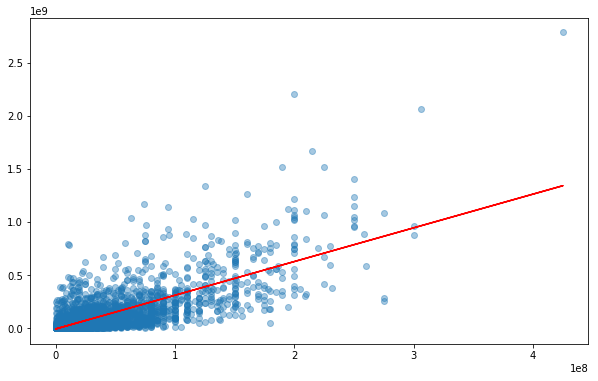

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train, alpha=0.4)
plt.plot(X_train, reg1.predict(X_train), color ='red')
plt.show()



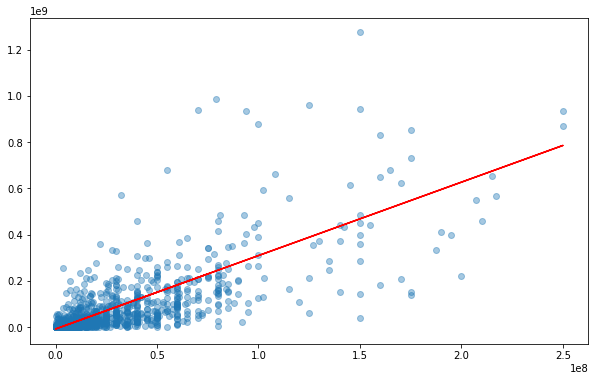

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(X_test,y_test, alpha=0.4)
plt.plot(X_test, reg1.predict(X_test), color ='red')
plt.show()